In [88]:
from numpy import dtype

name = "--"
student_number = 00000 # Write your student number here
date_returned = "23.2"

# Lab 6. Matrices
Hardware 1 - Mathematics Python Labs<br>
Information and Communication Technology<br>


## Setup

Read necessary libraries and functions.

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import det, inv, solve

---
## Problem 1

In [90]:
# Initialize random number generator
rng = np.random.default_rng(seed=student_number)

# Generate two random matrices
A = rng.integers(low=-10, high=10, size=(3, 3))
B = np.linalg.inv(A)

# Print them
print('A = \n', A)
print('B = \n', B)

A = 
 [[ 7 -3  6]
 [-6 -6  5]
 [-5 -1 -2]]
B = 
 [[ 0.19767442 -0.13953488  0.24418605]
 [-0.43023256  0.18604651 -0.8255814 ]
 [-0.27906977  0.25581395 -0.69767442]]


Calculate the matrix operations $C = AB$ and $D = BA$. What do you observe?

In [91]:
# My code to solve C = AB
C = np.dot(A,B)
print (C)

[[ 1.00000000e+00  0.00000000e+00  2.22044605e-16]
 [ 5.55111512e-17  1.00000000e+00 -9.99200722e-16]
 [ 2.22044605e-16  1.11022302e-16  1.00000000e+00]]


In [92]:
# My code to solve D = BA
D = np.dot(B,A)
print(D)

[[ 1.00000000e+00  1.66533454e-16 -3.33066907e-16]
 [-6.66133815e-16  1.00000000e+00 -4.44089210e-16]
 [ 1.11022302e-16 -1.11022302e-16  1.00000000e+00]]


In [93]:
# My observation about the results
# The values that are not exactly 1 or 0 are extremely close to zero (on the order of 10⁻¹⁶). Floating-point numbers have limited precision, and calculations can introduce tiny inaccuracies that accumulate. This matrix is numerically very close to the identity matrix.

---
## Problem 2

In [137]:
# Initialize random number generator
rng = np.random.default_rng(seed=student_number)

# Generate two random matrices
A = rng.integers(low=-10, high=10, size=(2, 2))
b = rng.integers(low=-10, high=10, size=(2, 1))

# Print them
print('A = \n', A)
print('b = \n', b)

A = 
 [[ 7 -3]
 [ 6 -6]]
b = 
 [[-6]
 [ 5]]


Write your own code that solves these equations: (**manually yourself, not using any linear algebra functions from numpy**) 

\begin{align*} 
a_{11} x + a_{12}y &=  b_1 \\ 
a_{21} x + a_{22} y &= b_2
\end{align*}


Then, check your answer using `numpy.linalg.solve()`.

In [141]:
# My code to solve the linear equations for x and y
def solve_linear_equations(A,b):
   a11, a12 = A[0]
   a21, a22 = A[1]
   b1, b2 = b[:,0]
   denominator = a21 * a12 - a11 * a22
   if denominator == 0:
      return None, None
   y = (a21 * b1 - a11 * b2) / denominator
   x = (b1 - a12 * y) / a11
   return x, y

A = np.array([[7, -3],[6, -6]])
b = np.array([[-6],[5]])
x, y = solve_linear_equations(A, b)

if x is None:
    print("No unique solution")
else:
    print(f"x = {x}, y = {y}")

x = -2.125, y = -2.9583333333333335


In [139]:
# Check with numpy.linalg.solve
x = solve(A,b)
print(x)

[[-2.125     ]
 [-2.95833333]]


---
## Problem 3
Solve the following equations using numpy linear algebra operations

$$ Ax = b $$

In [97]:
# Initialize random number generator
rng = np.random.default_rng(seed=student_number)

# Generate two random matrices
A = rng.integers(low=-100, high=100, size=(5, 5))
b = rng.integers(low=-100, high=100, size=(5, 1))

# Print them
print('A = \n', A)
print('b = \n', b)

A = 
 [[ 72 -25  61 -60 -56]
 [ 51 -48  -9 -12 -93]
 [-74  35 -29 -50  68]
 [ 35 -41  12  79  91]
 [  2 -66  24  11 -12]]
b = 
 [[ 70]
 [-53]
 [ 92]
 [-87]
 [ 36]]


In [98]:
# My solution for problem 3
x = solve(A, b)
print('x = \n', x)

x = 
 [[-1.12090229]
 [-0.26041029]
 [ 1.40667358]
 [-1.05700307]
 [ 0.08986722]]


---
## Problem 4
If $a_n = n$, find **the determinant** of the matrix
$A = \left( \begin{matrix} 
a_1 & a_2 & a_3 & a_4 & a_5 \\
a_5 & a_1 & a_2 & a_3 & a_4 \\
a_4 & a_5 & a_1 & a_2 & a_3 \\
a_3 & a_4 & a_5 & a_1 & a_2 \\
a_2 & a_3 & a_4 & a_5 & a_1 \\
\end{matrix} \right)$. Give the final answer in integers.

In [99]:
# Solution for problem 4
A = np.array([[1, 2, 3, 4, 5],[5,1,2,3,4],[4,5,1,2,3],[3,4,5,1,2],[2,3,4,5,1]])
A_det = np.linalg.det(A)
print('A_det = \n', int(A_det))

A_det = 
 1875


---
## Problem 5
If $ A(a, x) = \left( \begin{matrix}
a + x & a - x & a - x \\
a - x & a + x & a - x \\
a - x & a - x & a + x
\end{matrix} \right)$ and $a = 3.0$, find $x > 0$, so that $det(A(a, x)) = 0$. 

How are $a$ and $x$ related? When you have found the relationship, try another value for $a$.

Tip: Make a code that 
- uses linearly spaced values for $x \in [0, 10]$, for example. Use `numpy.linspace`.
- calculates the $f(x) = det(A(a, x))$ for all values of $x$ and then 
- makes a graphical plot of $f(x)$ versus $x$. 
- Finally, from the graph, find when $f(x) = 0$.

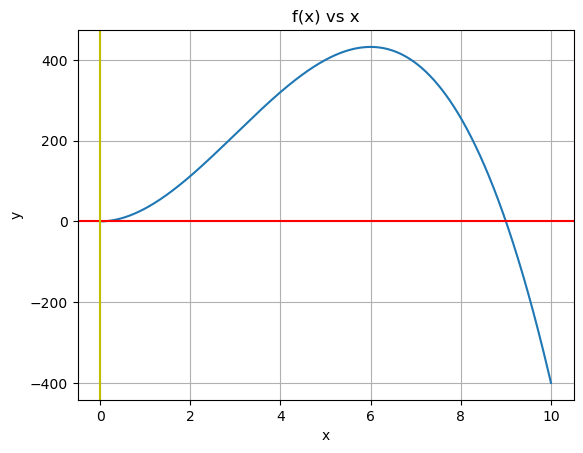

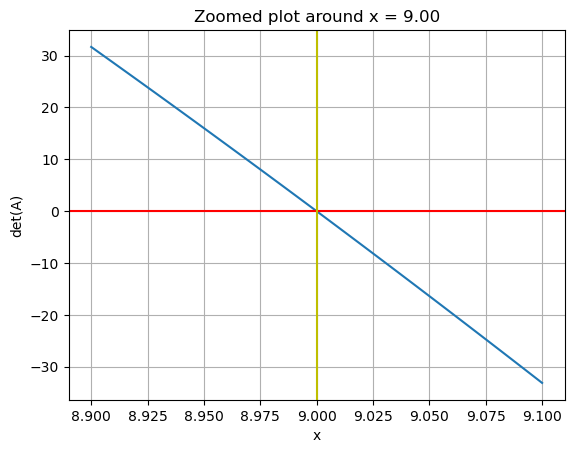

In [129]:
# Solution for problem 5
def det_A(a, x):
    return (a+x)**3 + 2*(a-x)**3 - 3*(a+x)*(a-x)**2

a = 3.0
x_values = np.linspace(0,10,1000)
det_values = [det_A(a, x)for x in x_values]

plt.plot(x_values, det_values)
plt.xlabel('x')
plt.ylabel('y')
plt.title("f(x) vs x")
plt.grid(True)
plt.axhline(y=0, color='r')
plt.axvline(x=0, color='y')
plt.show()

zoom_range = 0.1
zoom_x = np.linspace(9-zoom_range, 9+zoom_range, 100)
zoom_y = [det_A(a, x)for x in zoom_x]
plt.figure()
plt.plot(zoom_x, zoom_y)
plt.xlabel('x')
plt.ylabel('det(A)')
plt.title("Zoomed plot around x = 9.00")
plt.grid(True)
plt.axhline(y=0, color='r')
plt.axvline(x=9, color='y')
plt.show()

In [14]:
# My studies on the relationship between a and x
# a sets a kind of "center" point around which x causes the function to increase or decrease. The effect of changing a is to shift and scale the entire curve described by the function as x varies. By changing the value of a and rerunning the code, we can visually observe how this change affects the shape and position of the curve. we see that changing a shifts and scales the curve, but the general cubic nature of the relationship between det_A, a, and x remains. 